<a href="https://colab.research.google.com/github/MohYasser/ML-Assign1/blob/main/GUC_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [32]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [33]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
  if (Distance_Type==1):
    Cluster_Distance=distance.cdist(Data_points, Cluster_Centroids, 'euclidean')
  else: #Pearson Distance
      Cluster_Distance=np.zeros([Data_points.shape[0],Cluster_Centroids.shape[0]])
      
      #Calculating the distance for each point for each cluster centroid
      for i in range(len(Cluster_Centroids)):
        for j in range(len(Data_points)):
          #Correlation calculation
          corr= np.corrcoef(Cluster_Centroids[i],Data_points[j])
          #Distance calculation (1-corr)
          Cluster_Distance[j][i]=1-corr[0][1]
  return Cluster_Distance

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [34]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
  #Generate initial random cluster centroids
  idx = np.random.choice(len(Data_points), Number_of_Clusters, replace=False)
  
  centroids=Data_points[idx,:]
  clusters = np.argmin(GUC_Distance(centroids, Data_points, Distance_Type), axis =1 )
  while(True):
    if(Distance_Type==1):
      centroids = np.vstack([Data_points[clusters==i,:].mean(axis=0) for i in range(Number_of_Clusters)])
      clusters_tmp = np.argmin(GUC_Distance(centroids, Data_points, Distance_Type), axis = 1)
    #By Pearson distance
    else:
      #Summing all points in the same cluster
      ClusterPoints_sum=np.zeros([Number_of_Clusters,Data_points.shape[1]])
      #Counting the number of points in each cluster
      Points_count=np.zeros([Number_of_Clusters,Data_points.shape[1]])

      #Save the position of the lowest distance to know which point belongs to which cluster
      clusters_tmp=np.zeros(len(Data_points))
      distance=GUC_Distance(centroids, Data_points, Distance_Type)

      for i in range(distance.shape[0]):
        z=np.where(distance[i] == distance[i].min())
        z=z[0][0]
        clusters_tmp[i]=z
        
        ClusterPoints_sum[z]=np.add(ClusterPoints_sum[z], Data_points[i])
        Points_count[z]=np.add(Points_count[z],np.ones(Data_points.shape[1]))
        #calculate the cluster mean  
        for i in range(len(ClusterPoints_sum)):
          if np.array_equal(ClusterPoints_sum[i],np.array([0,0,0])):
            ClusterPoints_sum[i]=centroids[i]
            Points_count[i]=np.ones(Data_points.shape[1])
      centroids=np.divide(ClusterPoints_sum, Points_count)
    
    #out of distance calculation
    if(np.array_equal(clusters,clusters_tmp)): break
    clusters=clusters_tmp

  #out of while loop:
  #getting final cluster distance:
  Final_Cluster_Distance = GUC_Distance(centroids, Data_points, Distance_Type)
  sum=0
  for i in range(len(clusters_tmp)):
    sum=sum+(Final_Cluster_Distance[i][clusters_tmp[i]]**2)
  Cluster_Metric=sum/len(clusters_tmp)
  return [ Final_Cluster_Distance , Cluster_Metric, centroids, clusters ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [35]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [36]:
import math
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,clusters=[0],centroids=[], num_clusters=0):
    #In case of no clusters:
    if num_clusters == 0:
      if (clusters==[0]):
       clusters=np.zeros((len(X),), dtype=int)
       counter=X.shape[1]
       for i in range(X.shape[1]):
        for j in range(counter-1):
         j=j+i+1
         plt.xlabel('dimension '+str(i))
         plt.ylabel('dimension '+str(j))
         plt.scatter(X[:,i],X[:,j],c = clusters)
         plt.show()
        counter=counter-1
    #In case there is clusters:
    else:   
      counter=X.shape[1]
      for i in range(X.shape[1]):
        for j in range(counter-1):
         j=j+i+1
         plt.xlabel('dimension '+str(i))
         plt.ylabel('dimension '+str(j))
         plt.scatter(X[:,i],X[:,j],c = clusters)
         plt.scatter(centroids[:,i],centroids[:,j],c = 'red')
         plt.show()
        counter=counter-1 


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

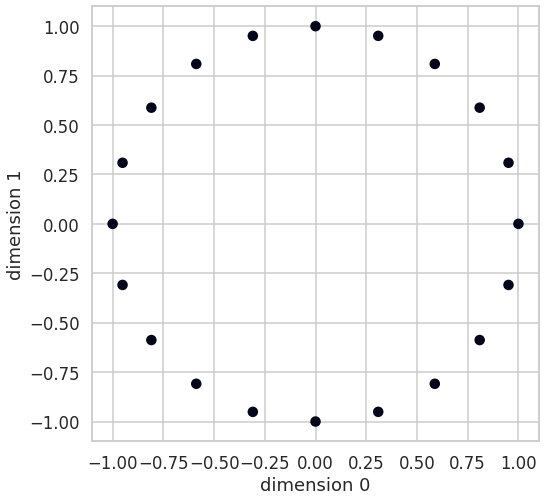

In [37]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

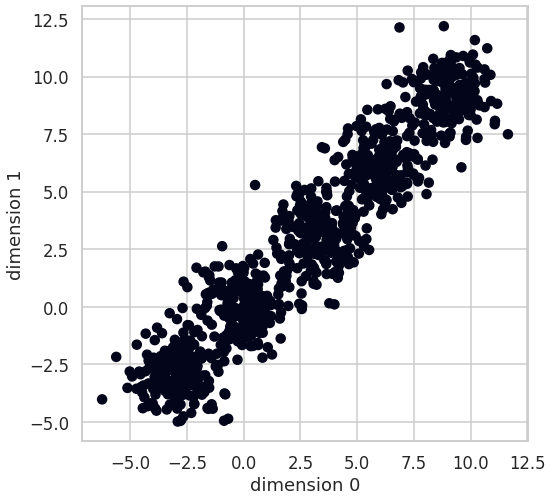

In [38]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

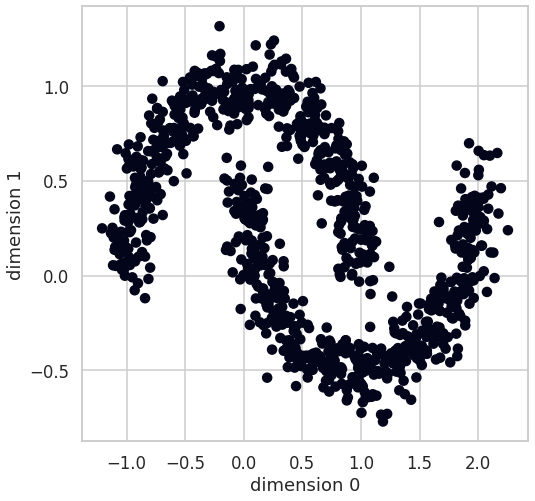

In [39]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [40]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
#Data is displayed 
#to display the data only it is assumed that the number of clusters is zero which is the default of the fuction  

Cluster_Metricarray=[]
d = list(range(1,11))
for i in range(10):
 i=i+1
 [ Final_Cluster_Distance , Cluster_Metric ,centroids,clusters]=GUC_Kmean ( X, int(i), 2 )
 Cluster_Metricarray.append(Cluster_Metric)
 display_cluster(X,clusters,centroids,int(i)) 

plt.plot(d,Cluster_Metricarray)
# naming the x axis
plt.xlabel('number of clusters ')
# naming the y axis
plt.ylabel('Cluster metric')
# giving a title to my graph
plt.title('Cluster metric of euclidean distance')
# function to show the plot
plt.show()

IndexError: ignored

In [41]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

Cluster_Metricarray=[]
d = list(range(1, 11))
for i in range(10):
 i=i+1
 [ Final_Cluster_Distance , Cluster_Metric ,centroids,P]=GUC_Kmean ( X, int(i), 2 )
 Cluster_Metricarray.append(Cluster_Metric)
 display_cluster(X,P,centroids,int(i)) 

plt.plot(d,Cluster_Metricarray)
# naming the x axis
plt.xlabel('number of clusters ')
# naming the y axis
plt.ylabel('Cluster metric')
# giving a title to my graph
plt.title('Cluster metric')
# function to show the plot
plt.show()

IndexError: ignored

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
Cluster_Metricarray=[]
d = list(range(1, 11))
for i in range(10):
 i=i+1
 [ Final_Cluster_Distance , Cluster_Metric ,centroids,P]=GUC_Kmean ( X, int(i), 2 )
 Cluster_Metricarray.append(Cluster_Metric)
 display_cluster(X,P,centroids,int(i)) 

plt.plot(d,Cluster_Metricarray)
# naming the x axis
plt.xlabel('number of clusters ')
# naming the y axis
plt.ylabel('Cluster metric')
# giving a title to my graph
plt.title('Cluster metric')
# function to show the plot
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
df= pd.read_csv("/content/Customer data.csv")
df = df.drop('ID', 1)
X=df.values
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [ ]:
Cluster_Metricarray=[]
d = list(range(1, 11))
for i in range(10):
 i=i+1
 [ Final_Cluster_Distance , Cluster_Metric ,centroids,P]=GUC_Kmean ( X,int(i), 1 )
 X1=sc.inverse_transform(X)
 Cluster_Metricarray.append(Cluster_Metric)
 display_cluster(X1,P,centroids,int(i)) 

plt.plot(d,Cluster_Metricarray)
# naming the x axis
plt.xlabel('number of clusters ')
# naming the y axis
plt.ylabel('Cluster metric')
# giving a title to my graph
plt.title('Cluster metric')
# function to show the plot
plt.show()

Implementing random centroid initializations and selecting best centroids using Distortion function

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

Cluster_Metricarray=[]
centroidsarray=[]
d = list(range(1, 11))
for i in range(10):
 i=i+1
 [ Final_Cluster_Distance , Cluster_Metric ,centroids,P]=GUC_Kmean ( X, 4, 1 )
 Cluster_Metricarray.append(Cluster_Metric)
 centroidsarray.append(centroids)
 display_cluster(X,P,centroids,4) 


loc=Cluster_Metricarray. index(min(Cluster_Metricarray))
bestcentroids=centroidsarray[loc]
print(bestcentroids)

plt.plot(d,Cluster_Metricarray)
# naming the x axis
plt.xlabel('random value centroid ')
# naming the y axis
plt.ylabel('distortion metric')
# giving a title to my graph
plt.title('distortion metric in regards to initial centroid value')
# function to show the plot
plt.show()

Selecting the best K value using Elbow method

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

Cluster_Metricarray=[]
d = list(range(1, 11))
for i in range(10):
 i=i+1
 [ Final_Cluster_Distance , Cluster_Metric ,centroids,P]=GUC_Kmean ( X, int(i), 1 )
 Cluster_Metricarray.append(Cluster_Metric)
 display_cluster(X,P,centroids,int(i)) 

plt.plot(d,Cluster_Metricarray)
# naming the x axis
plt.xlabel('number of clusters ')
# naming the y axis
plt.ylabel('distortion metric')
# giving a title to my graph
plt.title('distortion metric in regards to initial centroid value')
# function to show the plot
plt.show()